# Kaliebrierung der Kraft Messdosen

## Mit diesem Programm werden die Kraftmessdosen Kallibiert

Import der Pakete


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Im Nachfolgendenfeld muss der Link angegeben werden

In [6]:
file = 'Testlauf_2_Kraftgeregelt.XLSX'

Für den Import des Excels müssen eine Varaiblen definiert werden. Danach kann das Excel mit Pandas importiert werden

In [7]:
name = ['Zeit', 'Referenz kN', 'Prüfling kN']
data = pd.read_excel(file, header=None, names=name)

Im Nächsten Schritt werden die ersten Zeilen gelöscht.

In [8]:
delet = np.arange(0, 49, 1)
Werte = data.drop(delet, axis=0)

In [9]:
Werte


,Zeit,Referenz kN,Prüfling kN
49,0,0.000018,-0.000001
50,0.2,0.000008,-0.000005
51,0.4,0.000016,-0.000005
52,0.6,-0.000014,0.000001
53,0.8,-0.000025,0.000001
...,...,...,...
2612,512.600024,-0.002568,-0.002834
2613,512.800024,-0.002585,-0.002833
2614,513.000024,-0.00261,-0.002833
2615,513.200024,-0.002602,-0.002831


Als nächstes werden die Spalten komplet in Numpy geladen.

In [10]:
Zeit = np.round(np.array(Werte['Zeit'], dtype='float64'), 1)
Referenz = np.array(Werte['Referenz kN'], dtype='float64')
Prüfling = np.array(Werte['Prüfling kN'], dtype='float64')

Es muss nun von Hand definert werden, ob es ein Zug oder Druckversuch ist.
Zugversuch = 1
Druckversuch = 2

In [11]:
Versuch = 0

Nun wird die Maximalkraft definiert. Diese wird immer Positiv eingegeben. Für die spätere Berechnung wird positiv oder negativ automatisch definiert.

In [12]:
F_max = 2
if Versuch == 0:
    F_max = F_max * -1
else:
    F_max = F_max * 1

Plot der gesamten Versuchsreihe für die Referenzmessdose

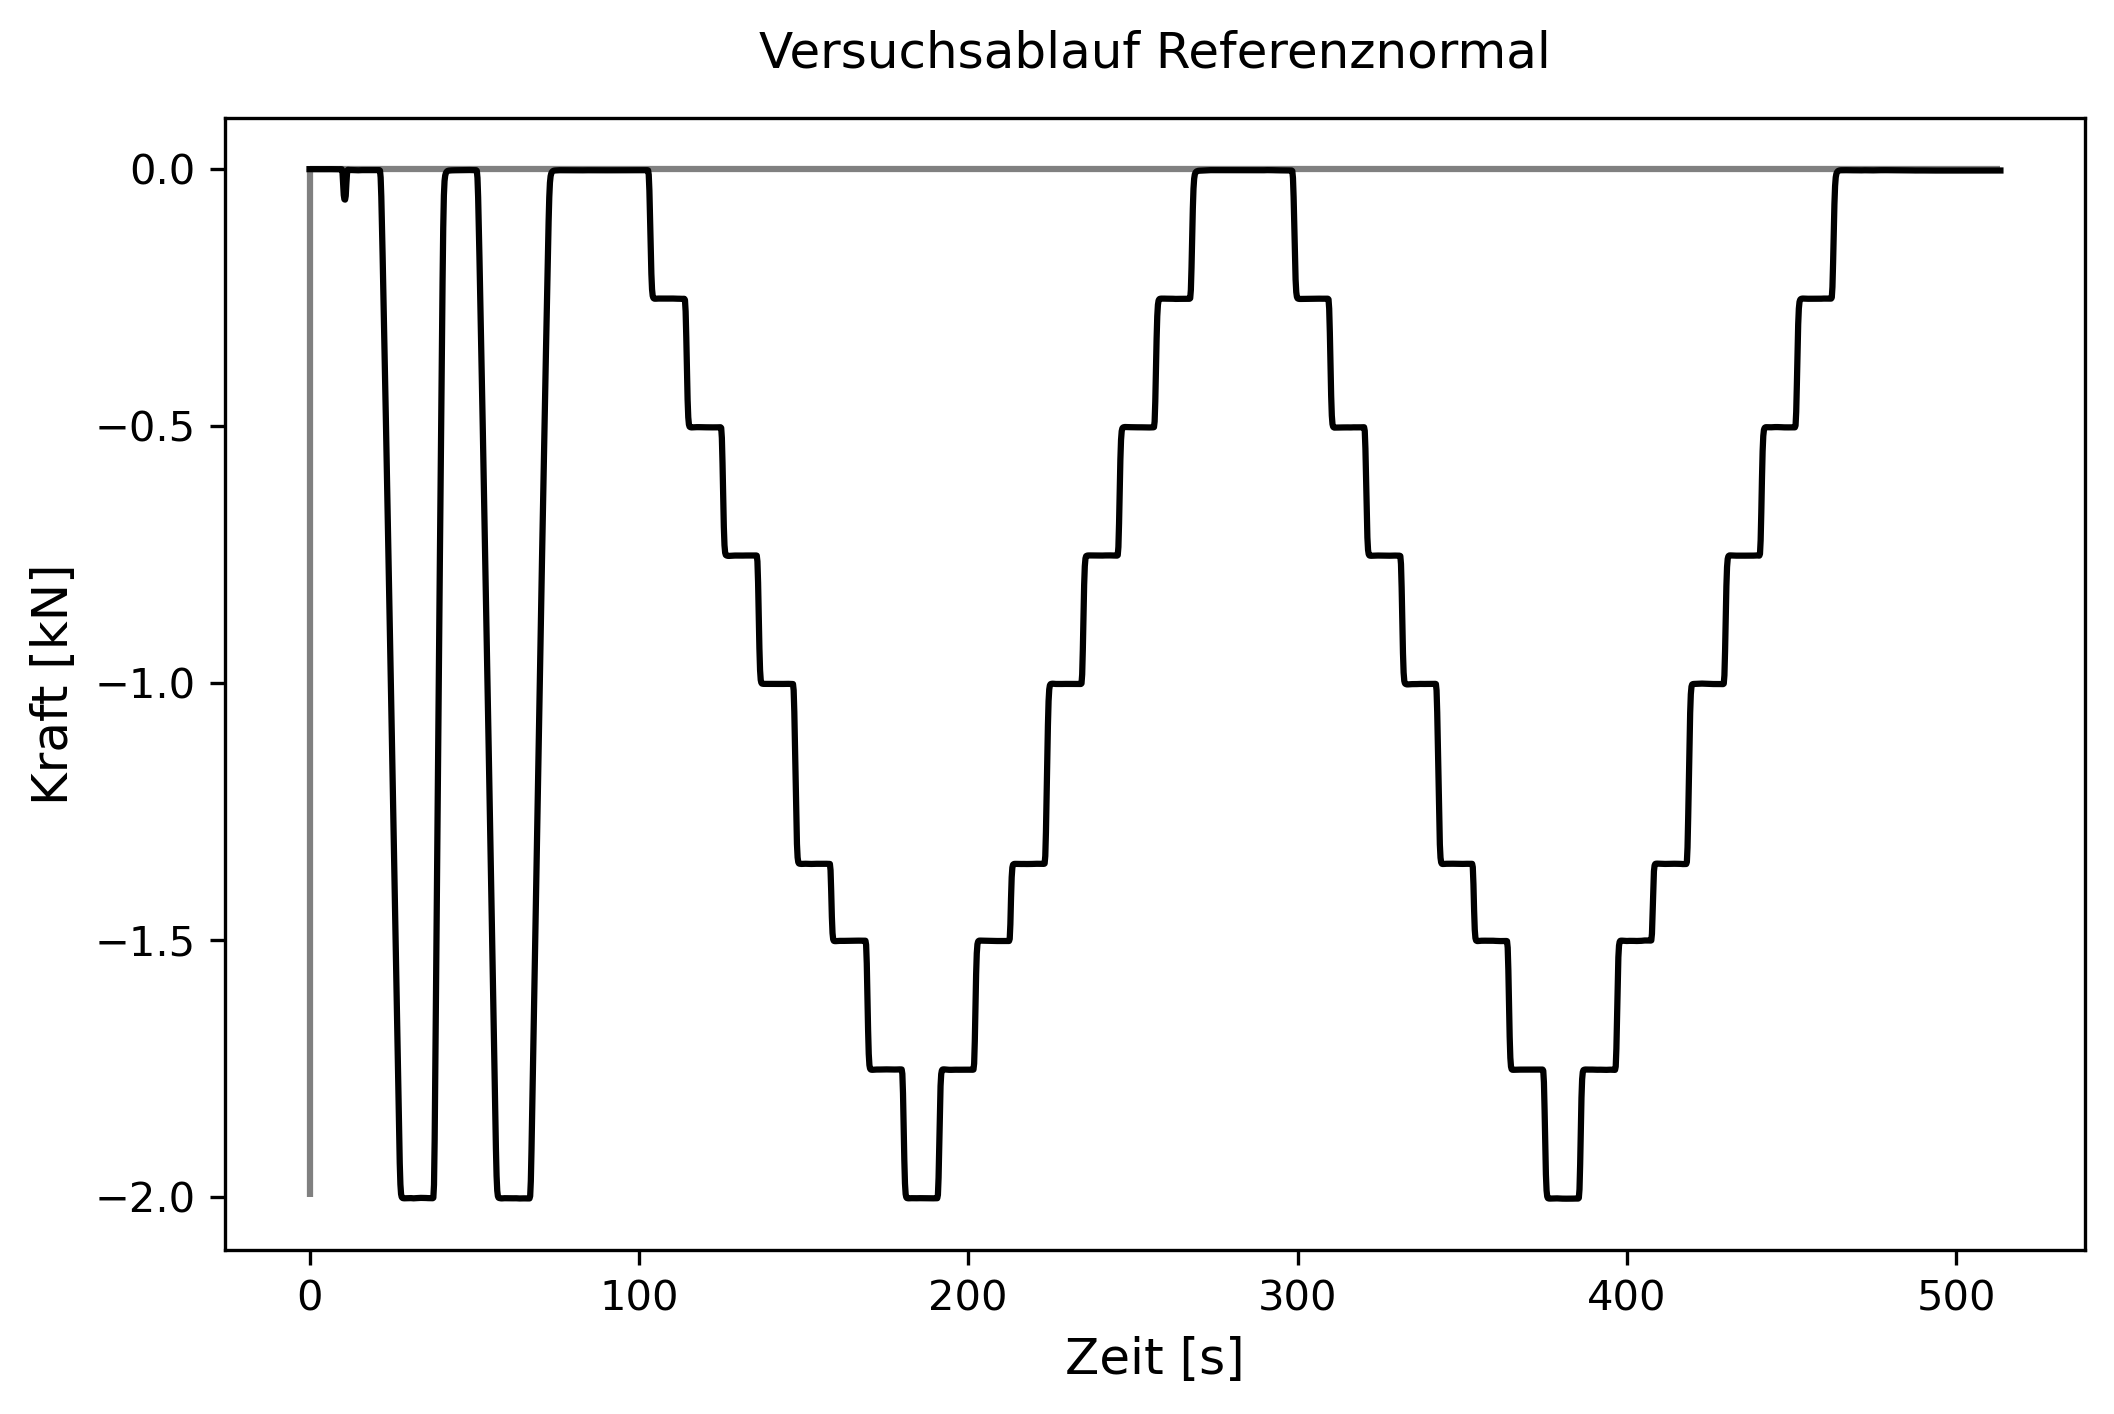

In [13]:
y_Beschriftung = np.linspace(0, F_max, num=5)
plt.figure(figsize=(8, 5), dpi=300)
plt.plot(Zeit,Referenz,color='black')
plt.hlines(0,min(Zeit),max(Zeit),colors='grey')
plt.vlines(min(Zeit),0,F_max,colors='grey')
plt.title('Versuchsablauf Referenznormal', pad=12,fontsize=12)
plt.xlabel('Zeit [s]' ,fontsize=12,)
plt.ylabel('Kraft [kN]' ,fontsize=12,)
plt.yticks(y_Beschriftung)
plt.show()

Die Laststufen für die Berechnung

In [14]:
Stufen = np.array([0.125, 0.25, 0.375, 0.5, 0.675, 0.75, 0.875, 1])
Laststufen = F_max * Stufen

In [15]:
Mittelwerte_Refernz = [[], [], [], [], [], [], [],  []]
Mittelwerte_Prüfling = [[], [], [], [], [], [], [], []]

In [63]:
x=7

In [64]:
Werte_F = Werte[(Werte['Referenz kN'] >= Laststufen[x] - 0.005) & (Werte['Referenz kN'] <= Laststufen[x] + 0.005)]
Werte_F_index = Werte[(Werte['Referenz kN'] >= Laststufen[x] - 0.005) & (Werte['Referenz kN'] <= Laststufen[x] + 0.005)].index.values
res = np.where(Werte_F_index[:-1] + 1 != Werte_F_index[1:])[0]

In [65]:
res = res[res > 10]
res

array([ 48,  98, 147], dtype=int64)

In [66]:
X_max_1 = Werte_F[:res[0] + 1]
X_max_2 = Werte_F[res[0] + 1:res[1] + 1]
X_max_3 = Werte_F[res[1] + 1:res[2] + 1]
X_max_4 = Werte_F[res[2] + 1:]

In [67]:
X_max_1



,Zeit,Referenz kN,Prüfling kN
189,28.000001,-2.000101,-2.003019
190,28.200001,-2.001705,-2.004617
191,28.400001,-2.002269,-2.005157
192,28.600001,-2.0025,-2.005356
193,28.800001,-2.002529,-2.005364
194,29.000001,-2.002479,-2.005292
195,29.200001,-2.002462,-2.00524
196,29.400001,-2.002453,-2.005197
197,29.600001,-2.0024,-2.005123
198,29.800001,-2.002289,-2.005007


In [68]:
X_max_2


,Zeit,Referenz kN,Prüfling kN
335,57.200003,-1.99826,-2.001066
336,57.400003,-2.001277,-2.004066
337,57.600003,-2.002025,-2.004818
338,57.800003,-2.002323,-2.005109
339,58.000003,-2.002564,-2.005318
340,58.200003,-2.002697,-2.005421
341,58.400003,-2.002715,-2.005409
342,58.600003,-2.002645,-2.005343
343,58.800003,-2.002521,-2.005232
344,59.000003,-2.002409,-2.005099


In [69]:
X_max_3


,Zeit,Referenz kN,Prüfling kN
955,181.200009,-2.000619,-2.003021
956,181.400009,-2.002065,-2.004472
957,181.600009,-2.002416,-2.00483
958,181.800009,-2.002563,-2.004955
959,182.000009,-2.002593,-2.004958
960,182.200009,-2.002514,-2.004899
961,182.400009,-2.002421,-2.004833
962,182.600009,-2.002361,-2.004779
963,182.800009,-2.002326,-2.00476
964,183.000009,-2.002362,-2.004805


In [70]:
X_max_4

,Zeit,Referenz kN,Prüfling kN
1928,375.800018,-1.998945,-2.001434
1929,376.000018,-2.002082,-2.004583
1930,376.200018,-2.002873,-2.005372
1931,376.400018,-2.003085,-2.005591
1932,376.600018,-2.003089,-2.00559
1933,376.800018,-2.003045,-2.005509
1934,377.000018,-2.002985,-2.005422
1935,377.200018,-2.002881,-2.00532
1936,377.400018,-2.00276,-2.005214
1937,377.600018,-2.002681,-2.005132


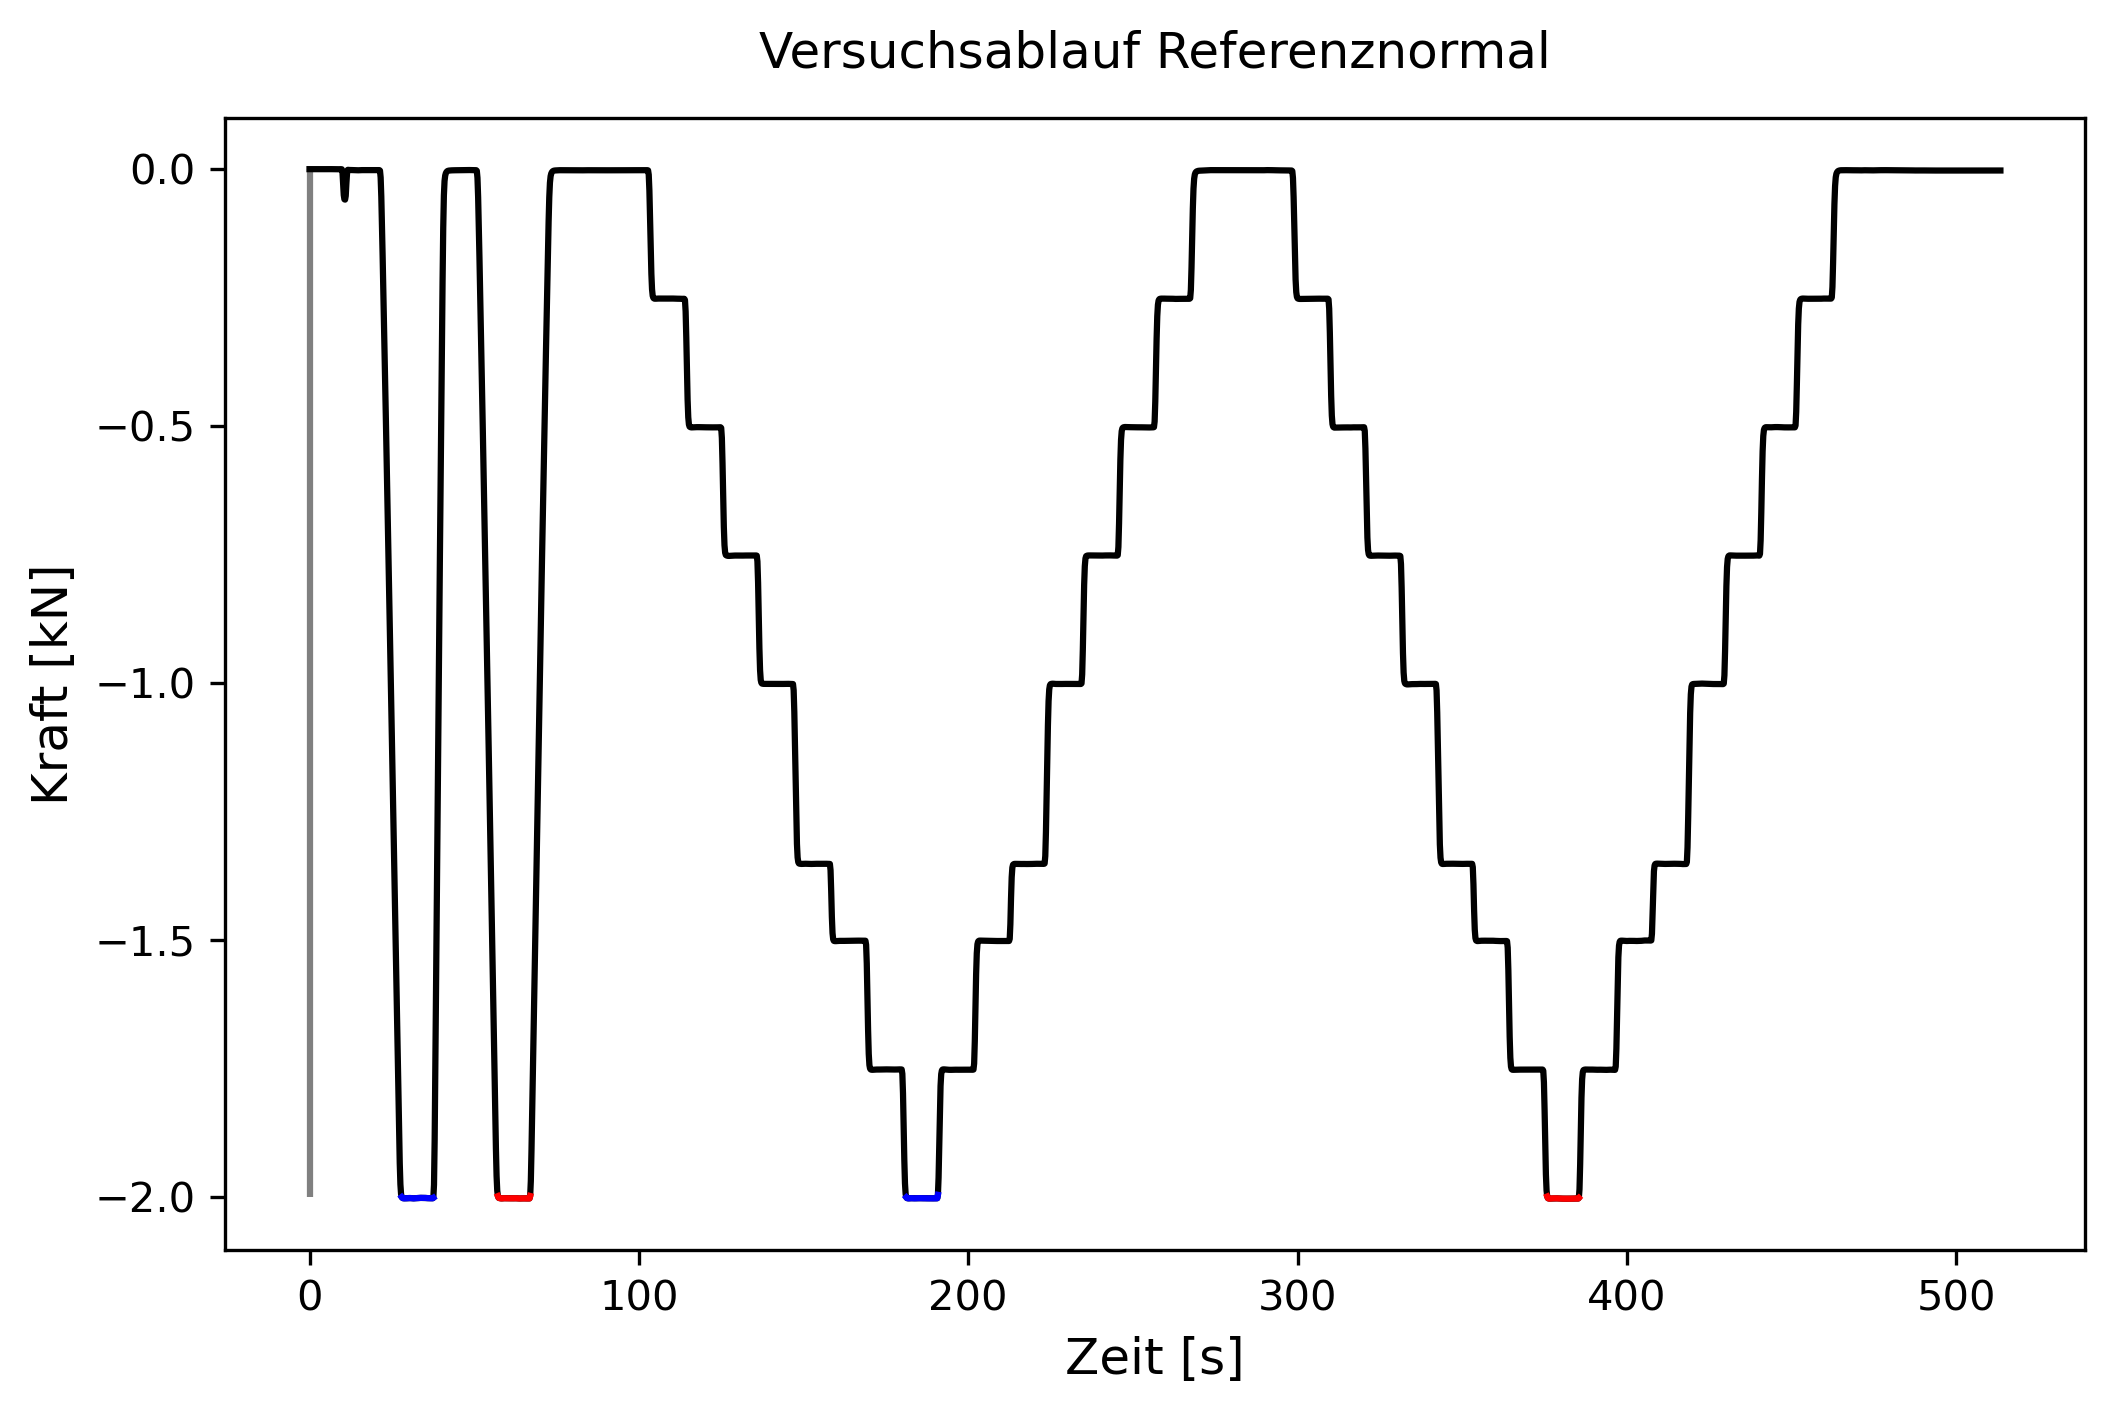

In [71]:
plt.figure(figsize=(8, 5), dpi=300)
plt.plot(Zeit,Referenz,color='black')
plt.plot(X_max_1['Zeit'],X_max_1['Referenz kN'],color='blue')
plt.plot(X_max_2['Zeit'],X_max_2['Referenz kN'],color='red')
plt.plot(X_max_3['Zeit'],X_max_3['Referenz kN'],color='blue')
plt.plot(X_max_4['Zeit'],X_max_4['Referenz kN'],color='red')
plt.vlines(min(Zeit),0,F_max,colors='grey')
plt.title('Versuchsablauf Referenznormal', pad=12,fontsize=12)
plt.xlabel('Zeit [s]' ,fontsize=12,)
plt.ylabel('Kraft [kN]' ,fontsize=12,)
plt.yticks(y_Beschriftung)
plt.show()